# A Simple Restaurant Review Binary  Classifier Using Naive Bayes



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Restaurant-Reviews.tsv", sep = "\t")

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data["Liked"].value_counts() #number of each class in "Liked" column

1    500
0    500
Name: Liked, dtype: int64

#Cleaning section

In [5]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
reviews = []

for i in range(len(data)):
  review = re.sub("[^a-zA-Z]", " ", data["Review"][i]) #alphabets only
  review = review.lower()                              #convert to lowercase letters
  review = review.split()                              #tokenization
  review =[s_stemmer.stem(word) for word in review if word not in stopwords.words("english")] # stemming and delete stopwords in same time
  review = " ".join(review)
  reviews.append(review)

print(reviews)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'high recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friend staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like good q

#Executing Bag Of Words model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer(max_features = 1548 )
x= cv.fit_transform(reviews).toarray()
x.shape

(1000, 1548)

In [9]:
y = data.iloc[:, 1].values
y.shape

(1000,)

#Naive Bayes algorithem

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.20, random_state = 0 )
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 1548) (200, 1548) (800,) (200,)


In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [12]:
y_predict = classifier.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_predict))


0.74


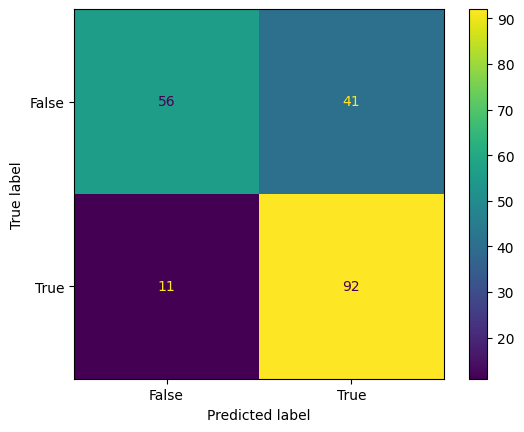

In [14]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

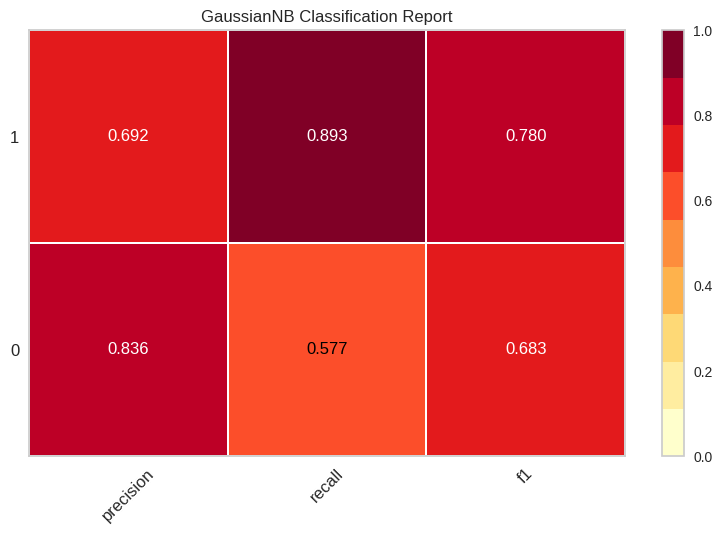

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [15]:
# print(classification_report(y_test, y_predict))
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(classifier, classes=None,)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()